In [350]:
rm(list = ls())

In [351]:
# load in the data
data = read.csv("../Data/Distances.csv")
data.rot = subset(data, data$Location == "ROT")
data.zsl = subset(data, data$Location == "ZSL")

In [352]:
# calculate inverse cdf
CalculateInverseCDF <- function(distance_data) {
  ## Calculate a cdf based on input data,
  # returning the sorted data and its probability ##
  sorted_distance = sort(distance_data)
  probability = seq(1, 0, length.out = length(sorted_distance))
  return(data.frame(sorted_distance, probability))
}

rot.cdf = CalculateInverseCDF(data.rot$Distance_Km)
zsl.cdf = CalculateInverseCDF(data.zsl$Distance_Km)

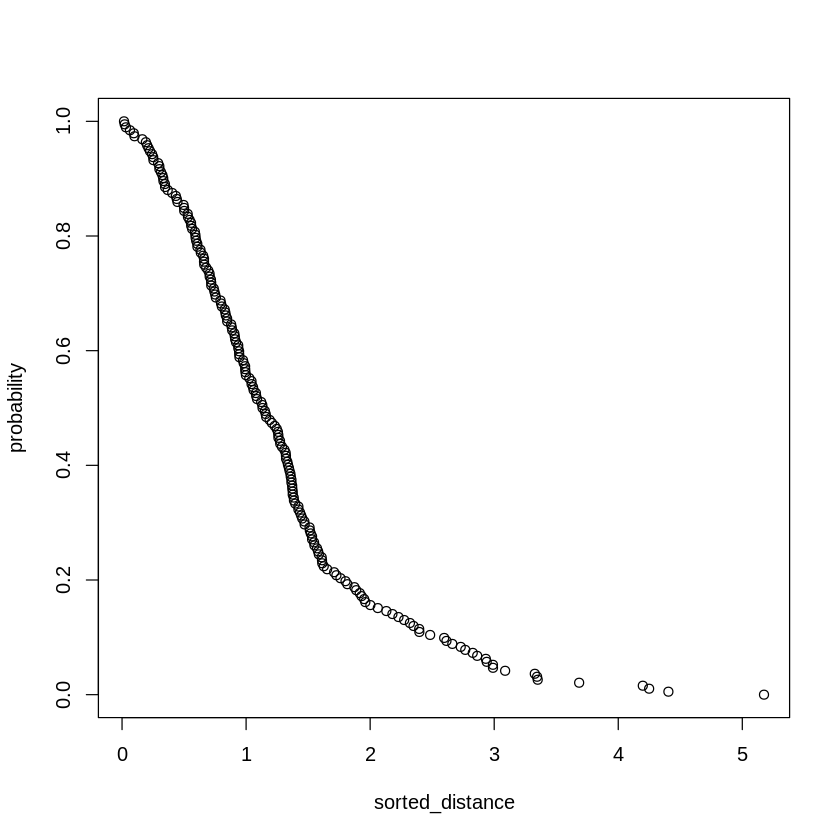

In [353]:
# plot the rot data
plot(rot.cdf)

In [414]:
# Create loglikelihood function for exponential
exponential = function(x, a){
  ## calculates the cdf for the exponential distribution ##
  return(1-(1 - exp(-a * x)))
}

like.exp <- function(a, x){
  sapply(X=a, FUN=function(a) prod(1 - (1 - exp(-a*x))) )
}

log.like.exp <- function(a, x){
  sapply(X=a, FUN=function(a) sum(0 - (0 - -a * x)) )
}

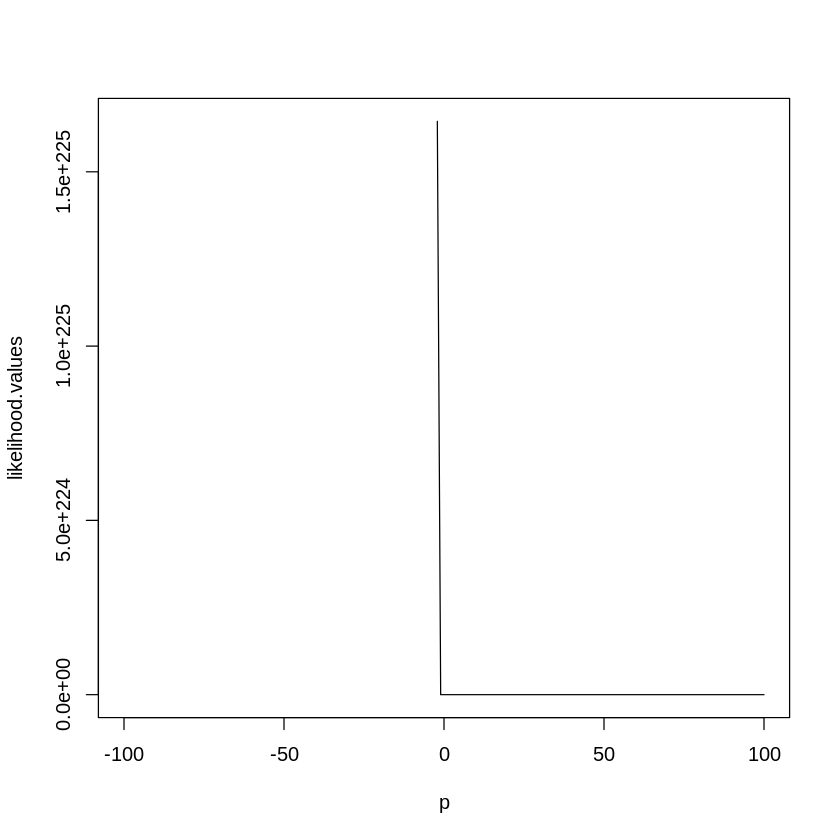

In [417]:
p = seq(-100, 100, length = nrow(rot.cdf))
likelihood.values = like.exp(p, rot.cdf$sorted_distance)
loglikelihood.values = log.like.exp(p, rot.cdf$sorted_distance)

plot(p, likelihood.values, type = "l")

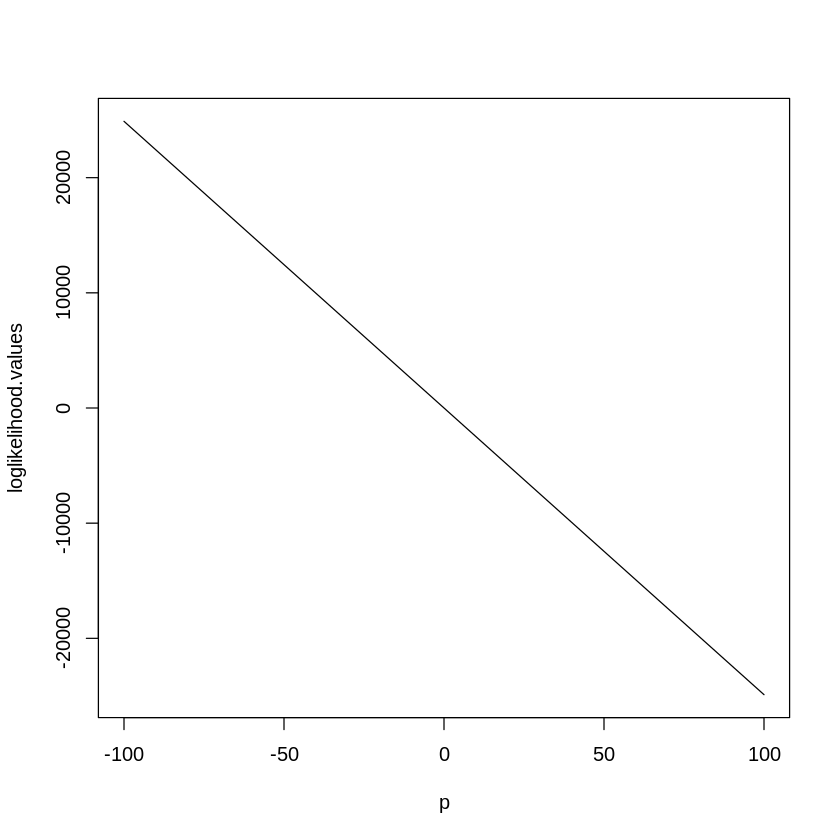

In [389]:
plot(p, loglikelihood.values, type = "l")